<a href="https://colab.research.google.com/github/Witcape/Convolution-WITH-WITHOUT-sklearn-digit-recognition.ipynb/blob/main/Digit_Recognition_with_Dense_SkLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2
import tqdm
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_dir = '/content/drive/MyDrive/dataset'

features = []
labels = []

for label in range(10):
  loc = os.path.join(data_dir,f'digit_{label}')
  for file_name in tqdm(os.listdir(loc)):
    name = os.path.join(loc,file_name)
    image = cv2.imread(name,0)
    image = cv2.resize(image,(32,32))
    features.append(image)
    labels.append(label)

100%|██████████| 874/874 [00:19<00:00, 44.66it/s] 


In [6]:
X = np.array(features)
Y = np.array(labels)
X.shape

(6887, 32, 32)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

(4820, 32, 32) 
 (4820,)


Text(0.5, 1.0, 'Label = 3')

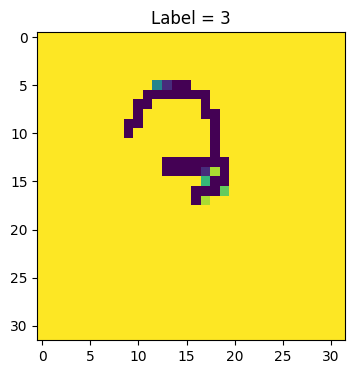

In [8]:
#visualising data
print(x_train.shape, "\n",y_train.shape)
plt.figure(figsize=(4,4))
plt.imshow(x_train[323])
plt.title(f'Label = {y_train[323]}')

In [10]:
sample_image = x_train[0]
channels = 1
height, width = sample_image.shape

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("x_train dtype:", x_train.dtype)
print("x_test dtype:", x_test.dtype)
print("y_train dtype:", y_train.dtype)
print("y_test dtype:", y_test.dtype)

x_train shape: (4820, 32, 32)
x_test shape: (2067, 32, 32)
y_train shape: (4820,)
y_test shape: (2067,)
x_train dtype: uint8
x_test dtype: uint8
y_train dtype: int64
y_test dtype: int64


In [11]:
x_train = x_train.reshape(-1, height, width, channels).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, height, width, channels).astype(np.float32) / 255.0

y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)

In [12]:
model = Sequential([
    Flatten(input_shape = (height,width)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation = 'softmax')
])

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 149002 (582.04 KB)
Trainable params: 149002 (582.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.fit(x_train, y_train, epochs=200, batch_size=32)

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/200
151/151 [==============================] - 3s 5ms/step - loss: 2.2674 - accuracy: 0.1508
Epoch 2/200
151/151 [==============================] - 1s 4ms/step - loss: 2.1597 - accuracy: 0.2253
Epoch 3/200
151/151 [==============================] - 1s 4ms/step - loss: 1.9817 - accuracy: 0.3037
Epoch 4/200
151/151 [==============================] - 1s 4ms/step - loss: 1.8482 - accuracy: 0.3622
Epoch 5/200
151/151 [==============================] - 1s 4ms/step - loss: 1.7666 - accuracy: 0.4058
Epoch 6/200
151/151 [==============================] - 1s 4ms/step - loss: 1.6849 - accuracy: 0.4359
Epoch 7/200
151/151 [==============================] - 1s 4ms/step - loss: 1.6416 - accuracy: 0.4438
Epoch 8/200
151/151 [==============================] - 1s 4ms/step - loss: 1.6052 - accuracy: 0.4614
Epoch 9/200
151/151 [==============================] - 1s 4ms/step - loss: 1.5830 - accuracy: 0.4668
Epoch 10/200
151/151 [==============================] - 1s 4ms/step - loss: 1.5291 - accura

In [18]:
random_image_path = '/content/7.png'
random_image = cv2.imread(random_image_path, cv2.IMREAD_GRAYSCALE)
random_image = cv2.resize(random_image, (32, 32))
random_image = random_image / 255.0
random_image = np.expand_dims(random_image, axis=0)

predictions = model.predict(random_image)

predicted_class = np.argmax(predictions)

print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 82ms/step
Predicted Class: 7
